In [82]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression model
from sklearn.model_selection import train_test_split  # Import function for splitting data into train and test sets

from sklearn import metrics  # Import metrics module from scikit-learn

import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import numpy for numerical computations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for enhanced visualization
sns.set()  # Set seaborn styling

# Import additional functions from scikit-learn for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Import stats module from scipy for additional statistical functions
from scipy import stats

In [83]:
# Load the dataset from the specified file path
data = pd.read_csv(r"C:\Users\User\Desktop\Rashad\DATA\breast_cancer.csv")

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Display the loaded dataset
data


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [84]:
# Calculate the count of each unique value in the 'Class' column
data['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [85]:
# Map values in the 'Class' column: 2 -> 0, 4 -> 1
data['Class'] = data['Class'].map({2: 0, 4: 1})

In [86]:
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1


In [88]:
# Separate features (X) and target variable (y)
x1 = data.drop(columns=['Class'])  # Features: Exclude the 'Class' column
y = data['Class']  # Target variable: 'Class' column

# Split the data into training and testing sets
# X_train: Training features, X_test: Testing features, y_train: Training target, y_test: Testing target
# The test_size parameter specifies the proportion of the dataset to include in the test split
# The random_state parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

In [89]:
# Initialize a logistic regression model
clf = LogisticRegression()

# Fit the logistic regression model to the training data
clf.fit(X_train, y_train)

LogisticRegression()

In [91]:
def evaluate(model, X_test, y_test):
    # Predict class labels for test set
    y_pred = model.predict(X_test)
    
    # Predict probabilities for test set
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC score
    roc_prob = roc_auc_score(y_test, y_prob)
    
    # Calculate Gini coefficient
    gini_prob = roc_prob * 2 - 1
    
    # Generate confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    # Print model performance metrics
    print('Model Performance:')
    print('Gini coefficient:', gini_prob * 100)
    print('Confusion Matrix:')
    print(confusion_matrix)
    print('Classification Report:')
    print(report)

In [93]:
# Evaluate the logistic regression model using the evaluate function
result = evaluate(clf, X_test, y_test)

Model Performance
Gini prob is 99.51986032300304
[[78  1]
 [ 5 53]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



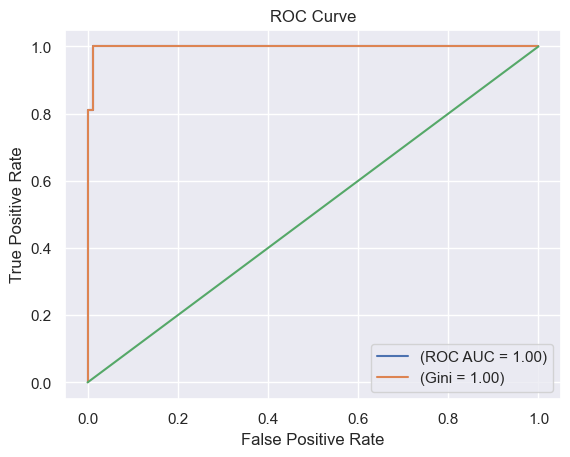

In [96]:
# Predict probabilities for the test set using the logistic regression model
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate Gini coefficient
gini = (2 * roc_auc_score(y_test, y_prob)) - 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='(ROC AUC = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add legend
plt.legend(loc='lower right')
plt.show()

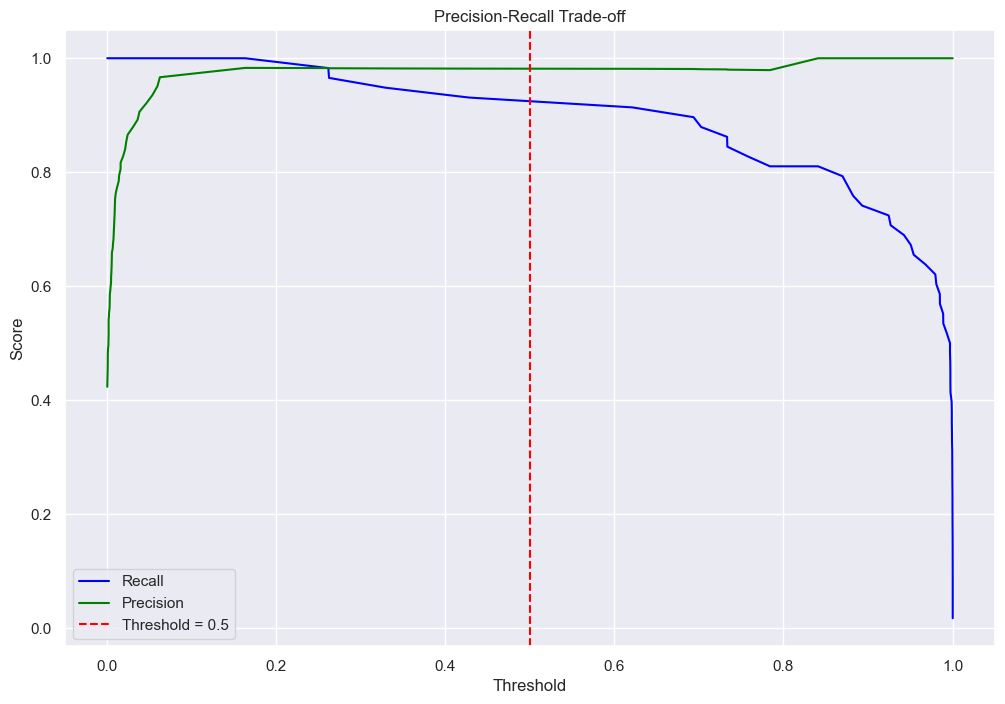

In [97]:
# Calculate predicted probabilities for the test set using the logistic regression model
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall trade-off
plt.figure(figsize=(12, 8))
plt.plot(thresholds, recall[:-1], label='Recall', color='blue')
plt.plot(thresholds, precision[:-1], label='Precision', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.grid(True)
plt.show()